K-means clusterisation model

This model was created to check whether there are any natural clusters (groups) of diseases in the dataset. The results of k-means clustering will then be compared with the division of the dataset into disease groups based on substantive criteria.

In [1]:
import pandas as pd
import warnings
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from IPython.display import display

warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns', None)

Load prepared dataset

In [2]:
scaled_df = pd.read_csv('../Data/scaled_df.csv')

In [3]:
scaled_df.head()

,Age,Gender,Sickness_Duration_Months,RBC_Count,Hemoglobin,Hematocrit,MCV,MCH,MCHC,RDW,Reticulocyte_Count,WBC_Count,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,PLT_Count,MPV,ANA,Esbach,MBL_Level,ESR,C3,C4,CRP,Anti-dsDNA,Anti-Sm,Rheumatoid factor,ACPA,Anti-TPO,Anti-Tg,Anti-SMA,Low-grade fever,Fatigue or chronic tiredness,Dizziness,Weight loss,Rashes and skin lesions,Stiffness in the joints,Brittle hair or hair loss,Dry eyes and/or mouth,General unwell feeling,Joint pain,Anti_dsDNA,Anti_enterocyte_antibodies,ASCA,Anti_BP180,ASMA,IgG_IgE_receptor,Anti_SRP,Anti_La_SSB,Anti_Jo1,Anti_desmoglein_1,EMA,Anti_type_VII_collagen,C1_inhibitor,Anti_epidermal_basement_membrane_IgA,Anti_OmpC,pANCA,Anti_tissue_transglutaminase,anti_Scl_70,Anti_Mi2,Anti_parietal_cell,Progesterone_antibodies,Anti_Sm,Diseases_ID,Diseases_eng,Diseases_group
0,0.712121,1,0.218487,0.016667,0.424000,0.596429,0.828276,0.966667,0.424,0.226667,0.632,0.534817,0.938889,0.160000,0.90750,0.7550,0.58,0.822857,0.216,1,0.482759,0.894444,0.816327,0.836364,0.78,0.310,1,1,0,1,0,1,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,Linear IgA disease,7
1,0.651515,0,0.890756,0.612500,0.630667,0.456429,0.661887,0.656667,0.014,0.811111,0.284,0.574072,0.594000,0.922667,0.08250,0.1675,0.66,0.968049,0.384,1,0.572414,0.488889,0.469388,0.000000,0.14,0.273,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,2,Dermatomyositis,4
2,0.363636,0,0.050420,0.170833,0.488000,0.457857,0.441814,0.571667,0.922,0.893333,0.872,0.589949,0.464889,0.540333,0.62000,0.8300,0.57,1.000000,0.140,1,0.824138,0.677778,0.897959,0.500000,0.32,0.102,1,0,1,1,1,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,Ord's thyroiditis,8
3,0.409091,1,0.092437,0.445833,0.661333,0.292857,0.364788,0.236667,0.586,0.142222,0.516,0.462308,0.248889,0.620000,0.56750,0.5300,0.22,0.074418,0.790,1,0.224138,0.472222,0.510204,0.600000,0.32,0.545,0,1,0,1,1,1,0,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,Restless legs syndrome,5
4,0.909091,1,0.252101,0.575000,0.161333,0.112857,0.605202,0.645000,0.058,0.922222,0.368,0.719465,0.351556,0.919000,0.13125,0.9000,0.90,0.918556,0.702,1,0.227586,0.522222,0.857143,0.300000,0.30,0.105,0,1,0,1,0,0,1,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,Autoimmune polyendocrine syndrome type 2 (APS2),8


In [4]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12499 entries, 0 to 12498
Data columns (total 68 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age                                   12499 non-null  float64
 1   Gender                                12499 non-null  int64  
 2   Sickness_Duration_Months              12499 non-null  float64
 3   RBC_Count                             12499 non-null  float64
 4   Hemoglobin                            12499 non-null  float64
 5   Hematocrit                            12499 non-null  float64
 6   MCV                                   12499 non-null  float64
 7   MCH                                   12499 non-null  float64
 8   MCHC                                  12499 non-null  float64
 9   RDW                                   12499 non-null  float64
 10  Reticulocyte_Count                    12499 non-null  float64
 11  WBC_Count      

Features selection

In [5]:
numerical_data = scaled_df.select_dtypes(include=['float64', 'int64']).drop(columns='Diseases_ID')

Droping features with low variance

In [6]:
variances = numerical_data.var()

low_variance_columns = variances[variances < 0.01].index

print("Low variance columns:", low_variance_columns)


Low variance columns: Index(['Anti_enterocyte_antibodies', 'ASMA', 'IgG_IgE_receptor', 'Anti_La_SSB',
       'Anti_desmoglein_1', 'EMA', 'Anti_type_VII_collagen', 'C1_inhibitor',
       'Anti_epidermal_basement_membrane_IgA', 'Anti_OmpC', 'pANCA',
       'anti_Scl_70', 'Anti_parietal_cell', 'Progesterone_antibodies'],
      dtype='object')


In [7]:
numerical_data_2 = numerical_data.drop(columns=low_variance_columns)

Selecting number of clusters

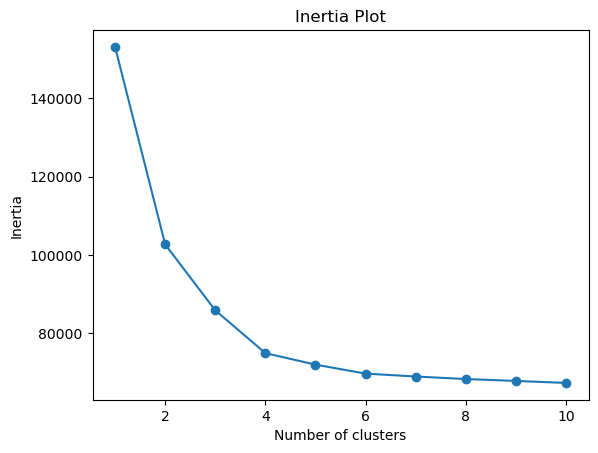

In [8]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(numerical_data_2)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia Plot')
plt.show()

Silhouette score analysis to check what number of clusters will give as the best quality of clusterisation

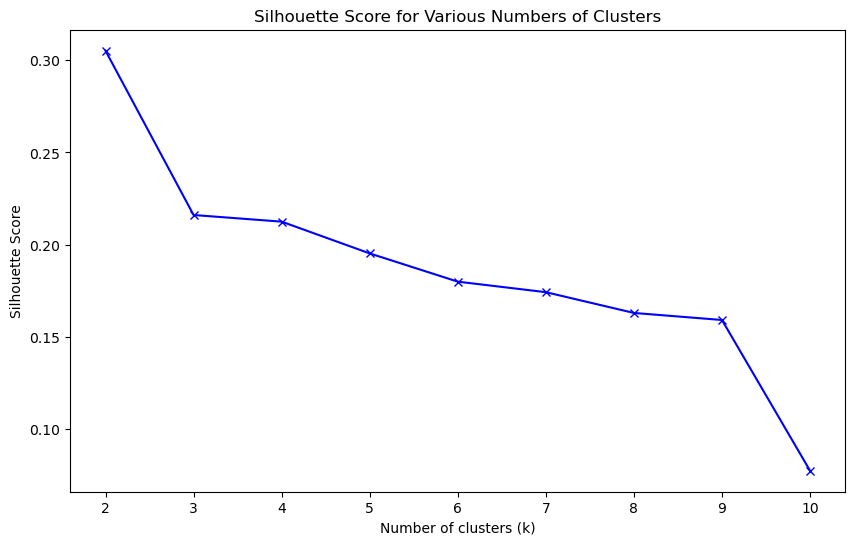

In [9]:
from sklearn.metrics import silhouette_score

range_n_clusters = range(2, 11)

silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(numerical_data_2)
    silhouette_avg = silhouette_score(numerical_data_2, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Various Numbers of Clusters')
plt.show()

The analysis of the inertia and silhouette score indicates that the optimal number of clusters is between 4 or 9. The inertia value hardly decreases beyond 6 clusters and the value of silhouette score drop slightly with more then 4 clusters and radically with more then 9 clusters. Based on the silhouette score analysis, it can be inferred that the clustering model quality based on given data will likely be rather low. Additionally the substantive interpretation of the results with less then 10 clusters may be difficult 

K-Means clusterisation

In [10]:
kmeans = KMeans(n_clusters=9, random_state=42)
clusters = kmeans.fit_predict(numerical_data_2)

Checking quality of the model

In [11]:
silhouette_avg = silhouette_score(numerical_data_2, clusters) 
print(f'Silhouette Score: {silhouette_avg:.2f}')

inertia = kmeans.inertia_ 
print(f'Inertia: {inertia:.2f}')

Silhouette Score: 0.16
Inertia: 67840.86


Based on the values of these two indicators, we can infer that the clusters are not only dispersed but also poorly defined.

Adding clustering results to DataFrame

In [12]:
scaled_df['Cluster'] = clusters

In [13]:
scaled_df.head()

,Age,Gender,Sickness_Duration_Months,RBC_Count,Hemoglobin,Hematocrit,MCV,MCH,MCHC,RDW,Reticulocyte_Count,WBC_Count,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,PLT_Count,MPV,ANA,Esbach,MBL_Level,ESR,C3,C4,CRP,Anti-dsDNA,Anti-Sm,Rheumatoid factor,ACPA,Anti-TPO,Anti-Tg,Anti-SMA,Low-grade fever,Fatigue or chronic tiredness,Dizziness,Weight loss,Rashes and skin lesions,Stiffness in the joints,Brittle hair or hair loss,Dry eyes and/or mouth,General unwell feeling,Joint pain,Anti_dsDNA,Anti_enterocyte_antibodies,ASCA,Anti_BP180,ASMA,IgG_IgE_receptor,Anti_SRP,Anti_La_SSB,Anti_Jo1,Anti_desmoglein_1,EMA,Anti_type_VII_collagen,C1_inhibitor,Anti_epidermal_basement_membrane_IgA,Anti_OmpC,pANCA,Anti_tissue_transglutaminase,anti_Scl_70,Anti_Mi2,Anti_parietal_cell,Progesterone_antibodies,Anti_Sm,Diseases_ID,Diseases_eng,Diseases_group,Cluster
0,0.712121,1,0.218487,0.016667,0.424000,0.596429,0.828276,0.966667,0.424,0.226667,0.632,0.534817,0.938889,0.160000,0.90750,0.7550,0.58,0.822857,0.216,1,0.482759,0.894444,0.816327,0.836364,0.78,0.310,1,1,0,1,0,1,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,Linear IgA disease,7,7
1,0.651515,0,0.890756,0.612500,0.630667,0.456429,0.661887,0.656667,0.014,0.811111,0.284,0.574072,0.594000,0.922667,0.08250,0.1675,0.66,0.968049,0.384,1,0.572414,0.488889,0.469388,0.000000,0.14,0.273,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,2,Dermatomyositis,4,6
2,0.363636,0,0.050420,0.170833,0.488000,0.457857,0.441814,0.571667,0.922,0.893333,0.872,0.589949,0.464889,0.540333,0.62000,0.8300,0.57,1.000000,0.140,1,0.824138,0.677778,0.897959,0.500000,0.32,0.102,1,0,1,1,1,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,Ord's thyroiditis,8,3
3,0.409091,1,0.092437,0.445833,0.661333,0.292857,0.364788,0.236667,0.586,0.142222,0.516,0.462308,0.248889,0.620000,0.56750,0.5300,0.22,0.074418,0.790,1,0.224138,0.472222,0.510204,0.600000,0.32,0.545,0,1,0,1,1,1,0,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,Restless legs syndrome,5,0
4,0.909091,1,0.252101,0.575000,0.161333,0.112857,0.605202,0.645000,0.058,0.922222,0.368,0.719465,0.351556,0.919000,0.13125,0.9000,0.90,0.918556,0.702,1,0.227586,0.522222,0.857143,0.300000,0.30,0.105,0,1,0,1,0,0,1,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,Autoimmune polyendocrine syndrome type 2 (APS2),8,1


Checking diseases value counts in each cluster

In [14]:
cluster_analysis = scaled_df.groupby('Cluster')['Diseases_eng'].value_counts().reset_index(name='Counts')

display(cluster_analysis.style.set_caption("Most Common Diseases in Each Cluster"))


,Cluster,Diseases_eng,Counts
0,0,Myasthenia gravis,68
1,0,Lambert–Eaton myasthenic syndrome,49
2,0,Chronic inflammatory demyelinating polyneuropathy,48
3,0,Guillain-Barré syndrome,46
4,0,Opsoclonus myoclonus syndrome,46
5,0,Neuromyelitis optica (Devic's disease)/NMOSD,45
6,0,Optic neuritis,45
7,0,Fibromyalgia,44
8,0,Hashimoto's encephalopathy,43
9,0,Multiple sclerosis,42


In [15]:
cluster_summary = (
    scaled_df.groupby('Cluster')['Diseases_eng']
    .agg(lambda x: x.value_counts().idxmax())
    .reset_index()
)

cluster_summary['Count'] = (
    scaled_df.groupby('Cluster')['Diseases_eng']
    .agg(lambda x: x.value_counts().max())
    .values
)

cluster_summary.columns = ['Cluster', 'Most Frequent Disease', 'Count']

display(cluster_summary.style.set_caption("Most Frequent Diseases by Cluster").set_table_styles([
    {'selector': 'caption', 'props': [('font-size', '16px'), ('font-weight', 'bold'), ('color', 'white'), ('background-color', 'black')]}
]))


,Cluster,Most Frequent Disease,Count
0,0,Myasthenia gravis,68
1,1,Autoimmune oophoritis,89
2,2,Immune thrombocytopenia,99
3,3,Autoimmune oophoritis,81
4,4,Normal,2499
5,5,Endometriosis,184
6,6,Dermatomyositis,183
7,7,Dermatitis herpetiformis,101
8,8,Myasthenia gravis,81


Characteristics of individual clusters

In [16]:
cluster_analysis = scaled_df.drop(['Diseases_eng', 'Diseases_ID', 'Diseases_group'], axis=1).groupby('Cluster').mean()

cluster_analysis

,Age,Gender,Sickness_Duration_Months,RBC_Count,Hemoglobin,Hematocrit,MCV,MCH,MCHC,RDW,Reticulocyte_Count,WBC_Count,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,PLT_Count,MPV,ANA,Esbach,MBL_Level,ESR,C3,C4,CRP,Anti-dsDNA,Anti-Sm,Rheumatoid factor,ACPA,Anti-TPO,Anti-Tg,Anti-SMA,Low-grade fever,Fatigue or chronic tiredness,Dizziness,Weight loss,Rashes and skin lesions,Stiffness in the joints,Brittle hair or hair loss,Dry eyes and/or mouth,General unwell feeling,Joint pain,Anti_dsDNA,Anti_enterocyte_antibodies,ASCA,Anti_BP180,ASMA,IgG_IgE_receptor,Anti_SRP,Anti_La_SSB,Anti_Jo1,Anti_desmoglein_1,EMA,Anti_type_VII_collagen,C1_inhibitor,Anti_epidermal_basement_membrane_IgA,Anti_OmpC,pANCA,Anti_tissue_transglutaminase,anti_Scl_70,Anti_Mi2,Anti_parietal_cell,Progesterone_antibodies,Anti_Sm
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.469353,0.492424,0.490379,0.317515,0.335787,0.319704,0.498125,0.500521,0.508148,0.567233,0.558136,0.502847,0.501983,0.501183,0.507330,0.492372,0.509659,0.509367,0.490468,0.704545,0.569563,0.584243,0.606698,0.493156,0.490360,0.544024,0.508523,0.502841,0.509470,0.505682,0.483902,0.498106,0.520833,0.497159,0.476326,0.455492,0.492424,0.477273,0.486742,0.480114,0.482955,1.000000,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
1,0.481187,0.512781,0.518340,0.309208,0.332842,0.324163,0.509450,0.505917,0.494606,0.550920,0.562107,0.501169,0.497707,0.510024,0.491749,0.492773,0.488466,0.502865,0.501098,0.716499,0.567034,0.585575,0.591505,0.498373,0.492781,0.553832,0.515105,0.492641,0.452363,0.529822,0.478699,0.518978,0.519752,0.512006,0.489543,0.505809,1.000000,0.491867,0.493416,0.519752,0.524400,0.496514,0.501162,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
2,0.473478,0.501721,0.523120,0.315688,0.328358,0.317450,0.503236,0.497933,0.498833,0.554932,0.560213,0.502156,0.506406,0.500656,0.493865,0.498326,0.506489,0.497515,0.496000,0.722031,0.567170,0.587263,0.595086,0.502730,0.483941,0.545718,0.509466,0.523236,0.524957,0.499139,0.508606,0.507745,0.501721,0.503442,0.498279,0.497418,0.487952,0.476764,0.512909,0.522375,0.511188,0.487091,0.518933,0.000000,0.068847,0.136833,0.000000,0.072289,0.082616,0.000000,0.000000,0.000000,0.000000,0.07401,0.000000,0.070568,0.000000,0.069707,0.067126,0.074010,0.00000,0.000000,0.07315,0.000000,0.000000
3,0.472756,0.464766,0.500396,0.314331,0.331518,0.325013,0.505290,0.518574,0.513055,0.555459,0.558385,0.489989,0.502606,0.494981,0.495240,0.507009,0.506540,0.504735,0.497143,0.689628,0.586120,0.585814,0.602065,0.512841,0.491940,0.537544,0.532858,0.501979,0.508314,0.522565,0.495645,0.513856,0.504355,0.509105,0.486936,0.507522,0.000000,0.475059,0.476643,0.513856,0.512272,0.513856,0.508314,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
4,0.497985,0.499614,0.017377,0.706003,0.734470,0.682613,0.509170,0.508397,0.605660,0.332248,0.404315,0.471831,0.561172,0.501298,0.368326,0.379297,0.248689,0.484242,0.505643,0.035852,0.241070,0.222865,0.189000,0.541992,0.402506,0.049549,0.000000,0.000000,0.000000,0.000000,0.000386,0.000000,0.000386,0.000000,0.000000,0.000386,0.000386,0.000000,0.000000,0.000386,0.000000,0.000000,0.000386,0.035852,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035852,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000386,0.035852
5,0.483647,0.499702,0.493699,0.314590,0.337207,0.321235,0.494752,0.498900,0.489145,0.553906,0.568284,0.494692,0.505288,0.500427,0.494427,0.504987,0.500447,0.489183,0.499643,0.696482,0.566249,0.591214,0.60

ANOVA (Analysis of Variance) is used to determine which features are significantly different between clusters

In [17]:
import scipy.stats as stats

numerical_columns = [col for col in scaled_df.columns if col not in ['Diseases_eng', 'Diseases_ID', 'Diseases_group', 'Cluster']]

results = []

for col in numerical_columns:
    groups = [scaled_df[scaled_df['Cluster'] == cluster][col] for cluster in scaled_df['Cluster'].unique()]
    f_stat, p_val = stats.f_oneway(*groups)
    results.append({'Variable': col, 'F-Statistic': f_stat, 'P-Value': p_val})

anova_results = pd.DataFrame(results)

anova_results = anova_results.sort_values(by='P-Value').reset_index(drop=True)

significant_results = anova_results[anova_results['P-Value'] < 0.01]

print("Significant differences between clusters (ANOVA):")
display(significant_results)


Significant differences between clusters (ANOVA):


,Variable,F-Statistic,P-Value
0,Anti-SMA,329.504731,0.000000e+00
1,Anti-dsDNA,334.891364,0.000000e+00
2,Anti-Sm,329.386272,0.000000e+00
3,Rheumatoid factor,323.325588,0.000000e+00
4,ACPA,333.795097,0.000000e+00
5,Anti-TPO,318.623927,0.000000e+00
6,Anti-Tg,327.844632,0.000000e+00
7,Low-grade fever,333.873875,0.000000e+00
8,Fatigue or chronic tiredness,315.469737,0.000000e+00
9,Dizziness,321.520005,0.000000e+00


Cross tabulation is used to compare results of the clustering and substantive classification of patients based on medical knowledge (autoimmune idiseases of various anatomical systems of the human body)

In [18]:
crosstab_table = pd.crosstab(scaled_df['Cluster'], scaled_df['Diseases_group'])
print(f"Crosstab for Clusters and Diseases_group:")
display(crosstab_table.style.set_table_attributes("style='display:inline'"))

Crosstab for Clusters and Diseases_group:


Diseases_group,0,1,2,3,4,5,6,7,8,9
Cluster,,,,,,,,,,
0,0,0,0,0,0,1056,0,0,0,0
1,0,0,0,0,0,0,0,0,610,681
2,485,677,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,612,651
4,0,0,0,0,0,0,2499,95,0,0
5,0,0,506,1171,0,0,0,0,0,0
6,0,0,0,0,752,0,0,0,0,0
7,0,0,0,0,0,0,0,1554,0,0
8,0,0,0,0,0,1150,0,0,0,0


Saving DataFrame with clusters into csv file 

In [20]:
scaled_df.to_csv('../Data/scaled_df_clusters.csv', index=False)

In summary, the created model for grouping patients based on disease symptoms and diagnostic test results is of low quality. Additionally, the substantive interpretation of some of the obtained clusters is problematic (these clusters contain diseases of different anatomical systems of the human body)

Substantive interpretation of individual clusters

Most common Diseases in each cluster

Cluster 0: Neurological Autoimmune Disorders
Dominant Diseases: Myasthenia gravis, Lambert–Eaton myasthenic syndrome, Chronic inflammatory demyelinating polyneuropathy, Guillain-Barré syndrome.
Characteristics: Autoimmune diseases affecting the nervous system, including both peripheral and central components.
Proposed Name: Neurological Autoimmune Disorders.

Cluster 1: Autoimmune Endocrine and Vasculitis Diseases
Dominant Diseases: Autoimmune oophoritis, Autoimmune orchitis, Vasculitis, Kawasaki disease.
Characteristics: Diseases related to the endocrine system and inflammatory conditions affecting blood vessels.
Proposed Name: Endocrine and Vasculitis Disorders.

Cluster 2: Autoimmune Digestive and Hematological Disorders
Dominant Diseases: Immune thrombocytopenia, Autoimmune urticaria, Sarcoidosis, Celiac disease.
Characteristics: Diseases affecting the digestive and hematological systems, along with some systemic disorders.
Proposed Name: Digestive and Hematological Autoimmune Disorders.

Cluster 3: Mixed Vasculitis and Endocrine Disorders
Dominant Diseases: Autoimmune oophoritis, Autoimmune orchitis, Antiphospholipid syndrome, Vasculitis.
Characteristics: Similar to Cluster 1 but with greater diversity and mixed symptoms involving multiple systems.
Proposed Name: Mixed Vasculitis and Endocrine Disorders.

Cluster 4: Systemic Autoimmune Disorders
Dominant Diseases: Systemic Lupus Erythematosus (SLE), Psoriasis.
Characteristics: Systemic diseases with a broad range of symptoms affecting multiple body systems.
Proposed Name: Systemic Autoimmune Disorders.

Cluster 5: Autoimmune Disorders of Organs and Tissues
Dominant Diseases: Endometriosis, IgA nephropathy, Interstitial lung disease, Mooren's ulcer.
Characteristics: Organ-specific diseases targeting lungs, kidneys, eyes, and other tissues.
Proposed Name: Organ-Specific Autoimmune Disorders.

Cluster 6: Musculoskeletal Autoimmune Disorders
Dominant Diseases: Dermatomyositis, Rheumatoid arthritis, Polymyositis, Myositis.
Characteristics: Diseases affecting muscles, joints, and other components of the musculoskeletal system.
Proposed Name: Musculoskeletal Autoimmune Disorders.

Cluster 7: Dermatological Autoimmune Disorders
Dominant Diseases: Dermatitis herpetiformis, Hidradenitis suppurativa, Morphea, Discoid lupus erythematosus.
Characteristics: Skin and mucosal autoimmune diseases, often associated with visible dermatological changes.
Proposed Name: Dermatological Autoimmune Disorders.

Cluster 8: Rare Neurological Autoimmune Disorders
Dominant Diseases: Myasthenia gravis, Acute disseminated encephalomyelitis, Bickerstaff's encephalitis, Balo concentric sclerosis.
Characteristics: Rare neurological diseases, often involving demyelination and inflammation.
Proposed Name: Rare Neurological Autoimmune Disorders.